<a href="https://colab.research.google.com/github/Masel92/Masel92/blob/main/%D0%A2%D0%B2%D0%BE%D1%80%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pavelmaslov1992","key":"68b578fb9e00c1174aed10497b38ccc2"}'}

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib import pyplot as plt
import os
import kagglehub
import warnings
warnings.filterwarnings('ignore')

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
path = kagglehub.dataset_download("ashaychoudhary/heart-attack-in-youth-vs-adult-in-russia")
print("Path to dataset files:", path)

100%|██████████| 1.43M/1.43M [00:00<00:00, 1.54MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ashaychoudhary/heart-attack-in-youth-vs-adult-in-russia/versions/1


In [ ]:
FILE_PATH = path

In [ ]:
files = os.listdir(FILE_PATH)
for file in files:
    print(file)

heart_attack_russia_youth_vs_adult.csv


In [ ]:
df = pd.read_csv(f'{FILE_PATH}/heart_attack_russia_youth_vs_adult.csv')
df.head()

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,1,50,Male,Rural,110.0,196.5,15.9,76,High,False,...,Low,Low,Primary,Married,Rural,False,5,2.3,5,False
1,2,40,Female,Urban,138.8,157.5,27.1,82,Moderate,False,...,Low,Moderate,Higher,Married,Urban,False,1,5.0,4,False
2,3,26,Male,Rural,116.0,210.1,27.2,71,Moderate,False,...,Middle,High,Primary,Married,Urban,False,4,2.4,8,False
3,4,54,Female,Rural,133.5,170.5,26.0,74,Moderate,True,...,Middle,Moderate,Higher,Married,Urban,False,2,2.7,6,True
4,5,19,Female,Urban,108.0,224.5,27.5,67,Low,False,...,Middle,Low,Higher,Widowed,Urban,False,4,3.5,4,True


In [ ]:
df.columns

Index(['ID', 'Age', 'Gender', 'Region', 'Blood_Pressure', 'Cholesterol', 'BMI',
       'Heart_Rate', 'Exercise_Level', 'Smoking', 'Alcohol_Consumption',
       'Diabetes', 'Family_History', 'Stress_Level', 'Heart_Attack', 'Angina',
       'Heart_Disease_History', 'Diet', 'Sleep_Hours', 'Occupation',
       'Income_Level', 'Physical_Activity', 'Education_Level',
       'Marital_Status', 'Urban_Rural', 'Medication', 'Health_Awareness',
       'Daily_Water_Intake', 'Mental_Health', 'Obesity'],
      dtype='object')

* 'ID'- Идентификатоp
* 'Age'- Возраст
* 'Gender'- Пол
* 'Region'- Регион
* 'Blood_Pressure'- Кровяное давление
* 'Cholesterol'- Холестерин
* 'BMI'- ИМТ
* 'Heart_Rate'- Частота сердечных сокращений
* 'Exercise_Level'- Уровень физической активности
* 'Smoking'- Курение
* 'Alcohol_Consumption'- Потребление алкоголя
* 'Diabetes'- Диабет
* 'Family_History'- Семейная история
* 'Stress_Level'- Уровень стресса
* 'Heart_Attack'- Сердечный приступ
* 'Angina'- Стенокардия
* 'Heart_Disease_History'- История сердечных заболеваний
* 'Diet'- Диета
* 'Sleep_Hours'- Часы сна
* 'Occupation'- Профессия
* 'Income_Level'- Уровень дохода
* 'Physical_Activity'- Физическая активность
* 'Education_Level'- Уровень образования
* 'Marital_Status'- Семейное положение
* 'Urban_Rural'- Городская жизнь
* 'Medication'- Лекарства
* 'Health_Awareness'- Осведомленность о здоровье
* 'Daily_Water_Intake'- Ежедневное потребление воды
* 'Mental_Health'- Психическое здоровье
* 'Obesity'- Ожирение



In [ ]:
df.shape

(50000, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  int64  
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Region                 50000 non-null  object 
 4   Blood_Pressure         50000 non-null  float64
 5   Cholesterol            50000 non-null  float64
 6   BMI                    50000 non-null  float64
 7   Heart_Rate             50000 non-null  int64  
 8   Exercise_Level         50000 non-null  object 
 9   Smoking                50000 non-null  bool   
 10  Alcohol_Consumption    24976 non-null  object 
 11  Diabetes               50000 non-null  bool   
 12  Family_History         50000 non-null  bool   
 13  Stress_Level           50000 non-null  int64  
 14  Heart_Attack           50000 non-null  bool   
 15  An

In [ ]:
df = df.drop(['Family_History'], axis=1)
df = df.drop(['Urban_Rural'], axis=1)
df = df.drop(['Daily_Water_Intake'], axis=1)
df = df.drop(['Education_Level'], axis=1)
df = df.drop(['Income_Level'], axis=1)
df = df.drop(['Diet'], axis=1)
df = df.drop(['Marital_Status'], axis=1)
df = df.drop(['Health_Awareness'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  int64  
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Region                 50000 non-null  object 
 4   Blood_Pressure         50000 non-null  float64
 5   Cholesterol            50000 non-null  float64
 6   BMI                    50000 non-null  float64
 7   Heart_Rate             50000 non-null  int64  
 8   Exercise_Level         50000 non-null  object 
 9   Smoking                50000 non-null  bool   
 10  Alcohol_Consumption    24976 non-null  object 
 11  Diabetes               50000 non-null  bool   
 12  Stress_Level           50000 non-null  int64  
 13  Heart_Attack           50000 non-null  bool   
 14  Angina                 50000 non-null  bool   
 15  He

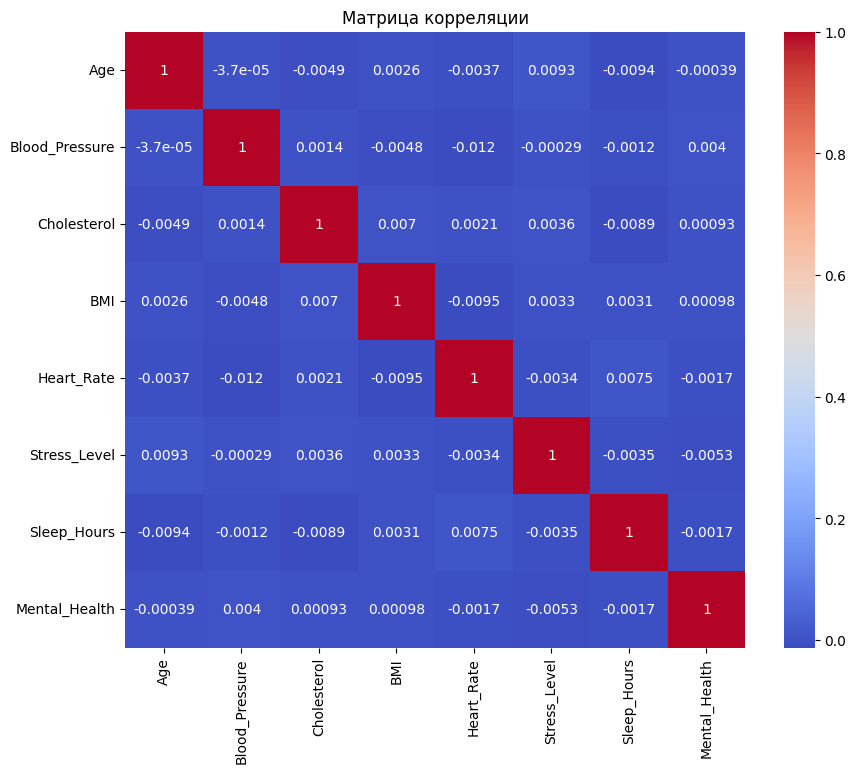

In [ ]:
numeric_columns = ['Age', 'Blood_Pressure', 'Cholesterol', 'BMI', 'Heart_Rate', 'Stress_Level', 'Sleep_Hours', 'Mental_Health']
corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Матрица корреляции')
plt.show()

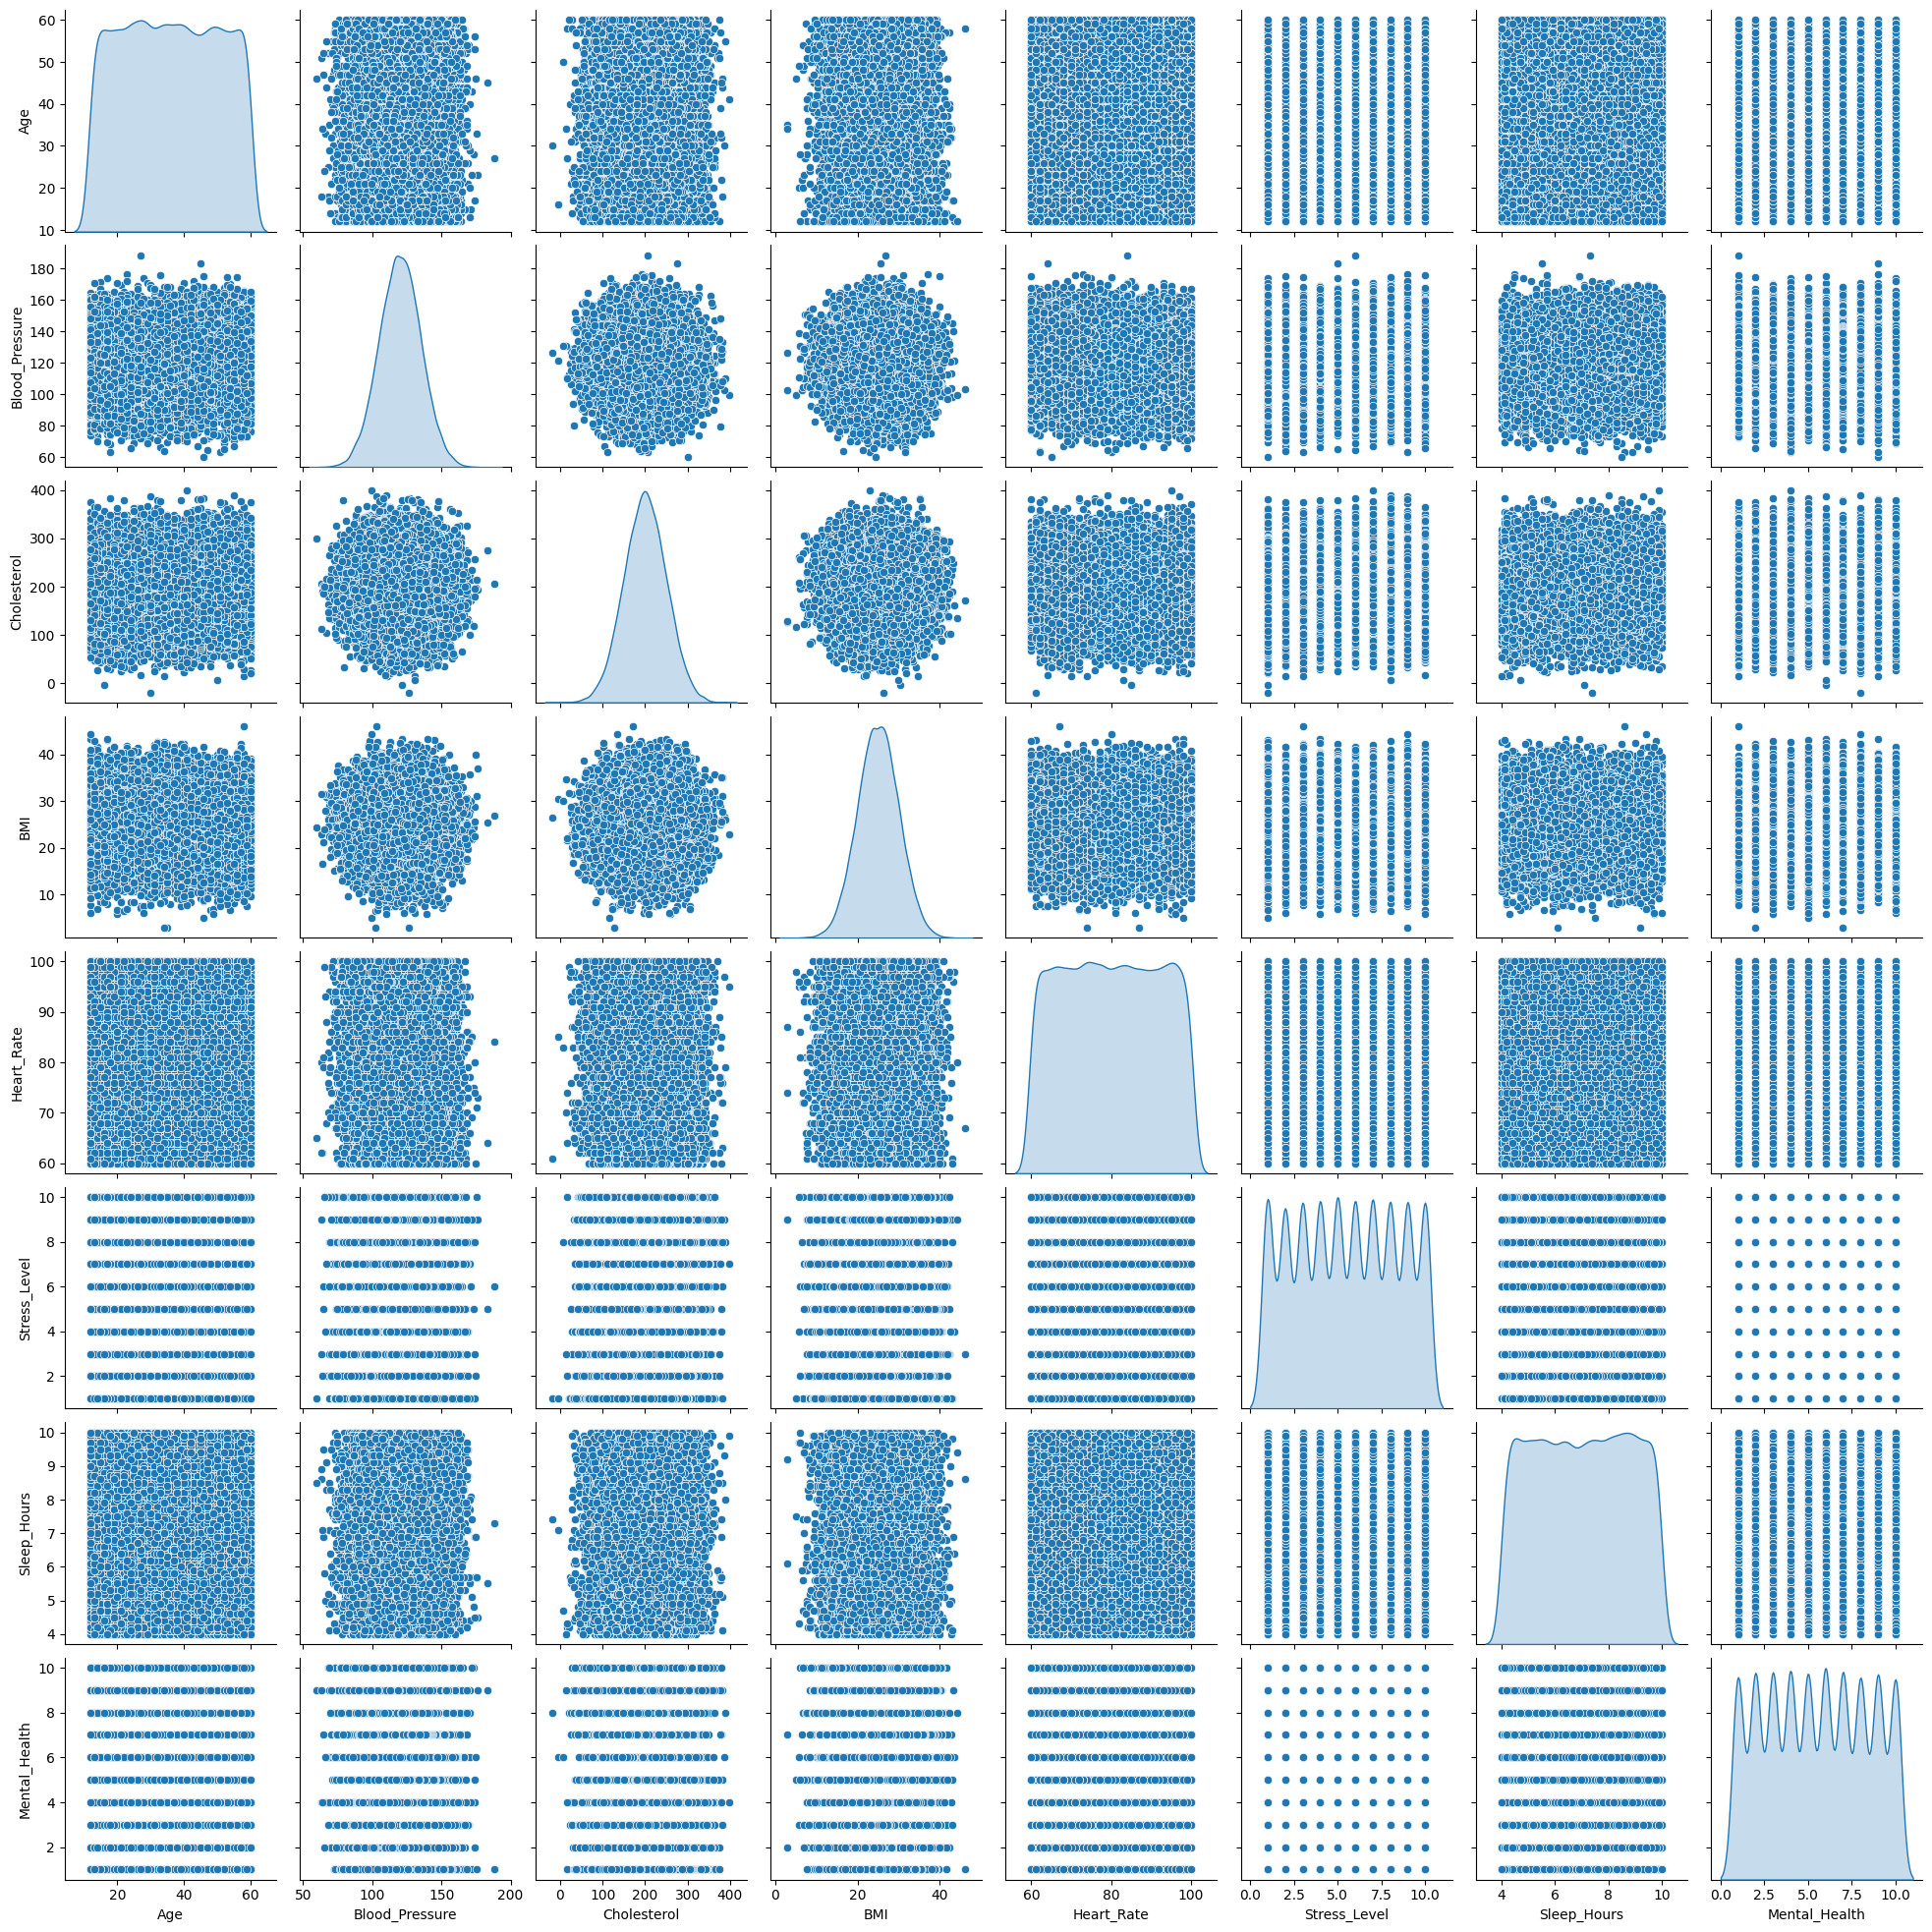

In [ ]:
sns.pairplot(df[numeric_columns], diag_kind="kde")
plt.show()

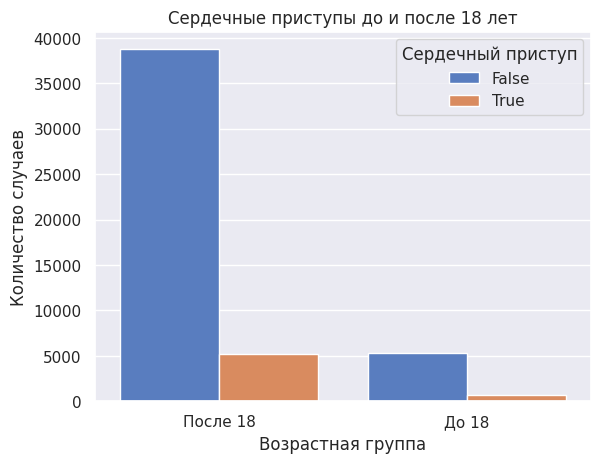

In [ ]:
df["Under_18"] = df["Age"].apply(lambda x: "До 18" if x < 18 else "После 18")

sns.set(style="darkgrid")
g = sns.countplot(x="Under_18", hue="Heart_Attack", data=df, palette="muted")
plt.title('Сердечные приступы до и после 18 лет')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество случаев')
plt.legend(title='Сердечный приступ')
plt.show()

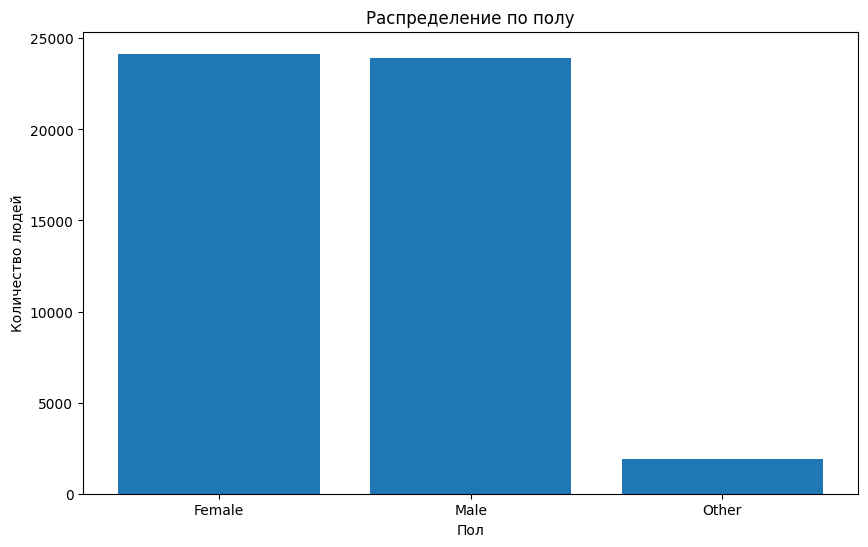

In [ ]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Пол')
plt.ylabel('Количество людей')
plt.title('Распределение по полу')
plt.show()

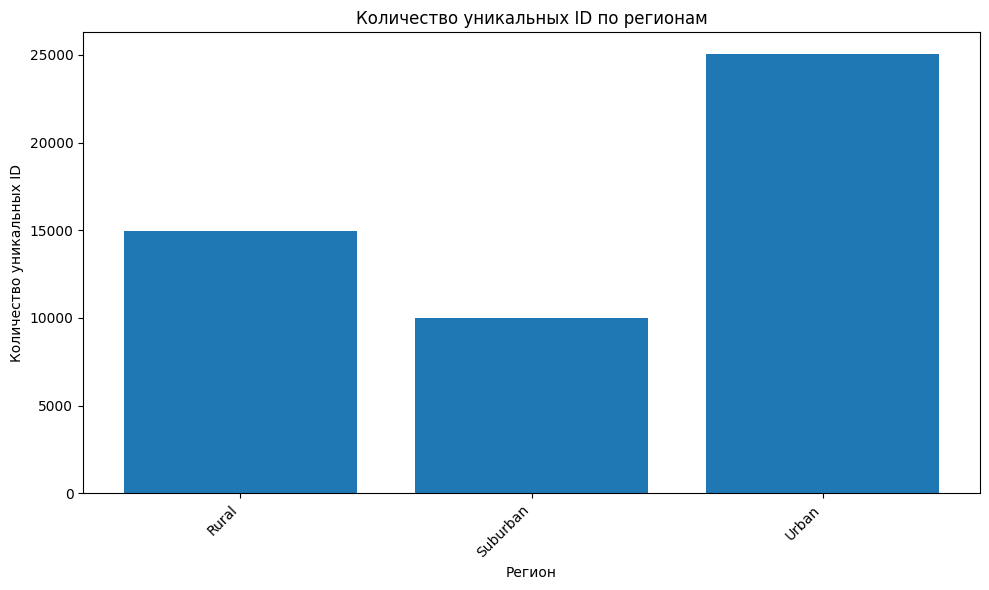

In [ ]:
region_count = df.groupby('Region').agg({'ID': 'nunique'})

# Строим столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.bar(region_count.index, region_count['ID'])
plt.xlabel('Регион')
plt.ylabel('Количество уникальных ID')
plt.title('Количество уникальных ID по регионам')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

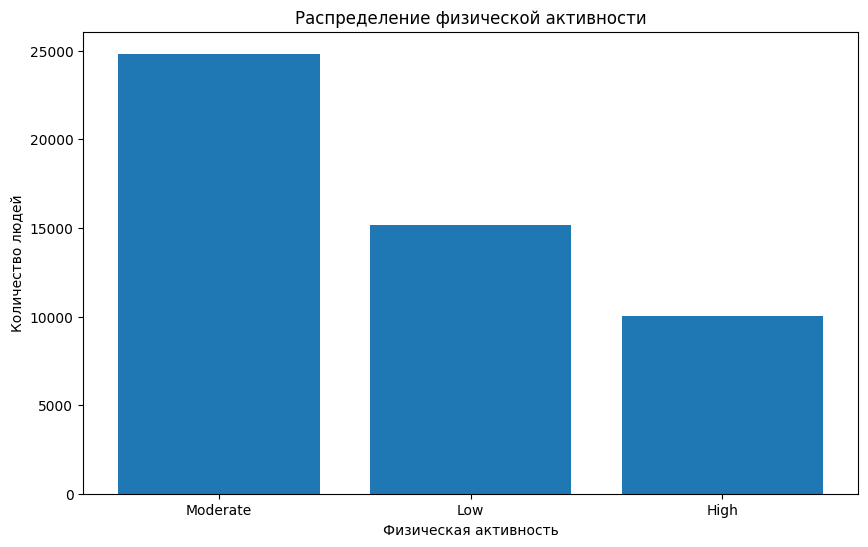

In [ ]:
plt.figure(figsize=(10, 6))
activity_counts = df['Physical_Activity'].value_counts()
plt.bar(activity_counts.index, activity_counts.values)
plt.xlabel('Физическая активность')
plt.ylabel('Количество людей')
plt.title('Распределение физической активности')
plt.show()

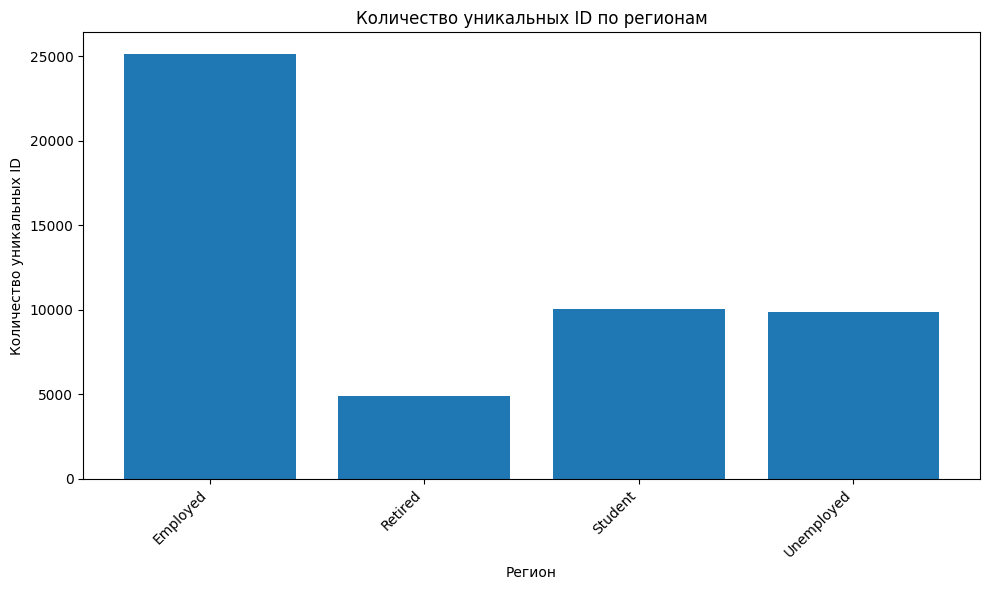

In [ ]:
region_count = df.groupby('Occupation').agg({'ID': 'nunique'})

# Строим столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.bar(region_count.index, region_count['ID'])
plt.xlabel('Регион')
plt.ylabel('Количество уникальных ID')
plt.title('Количество уникальных ID по регионам')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

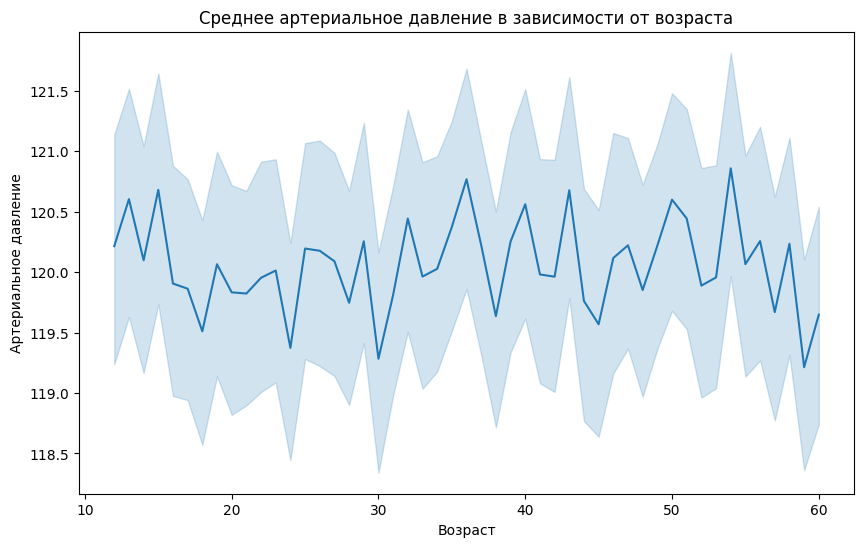

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Blood_Pressure', data=df)
plt.title('Среднее артериальное давление в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Артериальное давление')
plt.show()

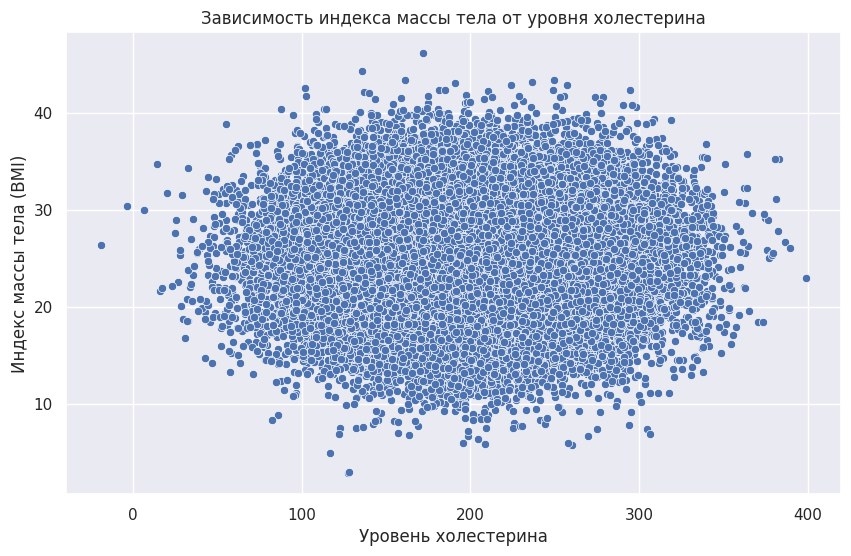

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cholesterol', y='BMI', data=df)
plt.title('Зависимость индекса массы тела от уровня холестерина')
plt.xlabel('Уровень холестерина')
plt.ylabel('Индекс массы тела (BMI)')
plt.show()

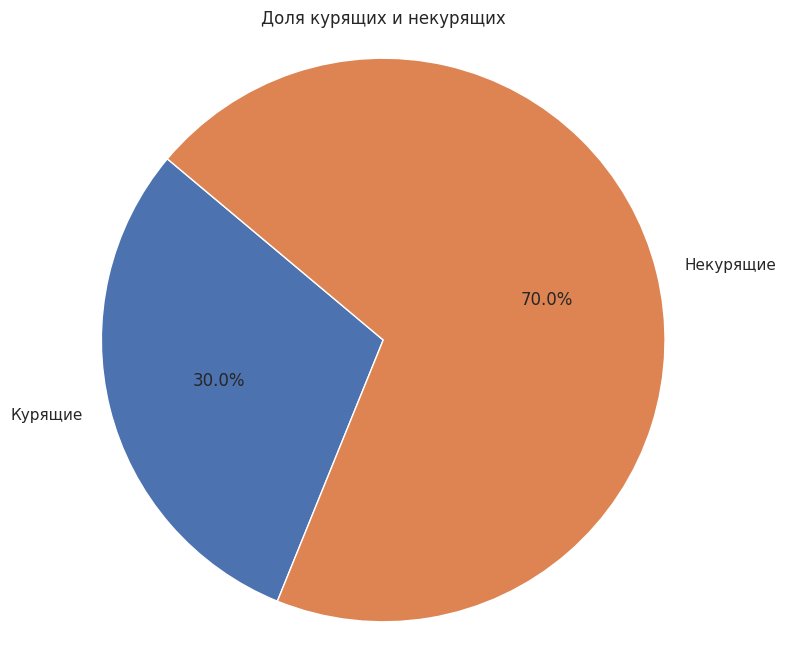

In [ ]:
smokers_count = len(df.query("Smoking == True"))
non_smokers_count = len(df.query("Smoking == False"))

data = {'Курящие': smokers_count, 'Некурящие': non_smokers_count}
labels = list(data.keys())
sizes = list(data.values())

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Доля курящих и некурящих')
plt.show()

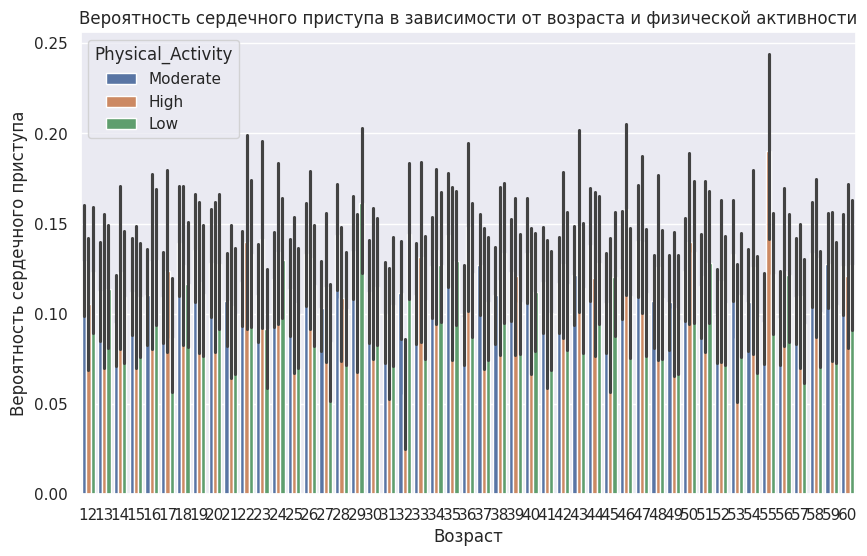

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Heart_Attack', hue='Physical_Activity', data=df)
plt.title('Вероятность сердечного приступа в зависимости от возраста и физической активности')
plt.xlabel('Возраст')
plt.ylabel('Вероятность сердечного приступа')
plt.show()

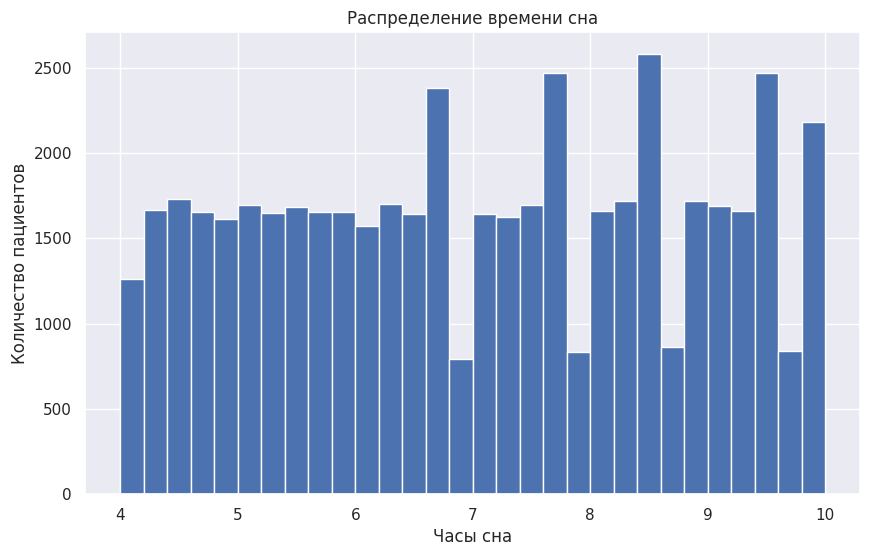

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Sleep_Hours'], bins=30)
plt.title('Распределение времени сна')
plt.xlabel('Часы сна')
plt.ylabel('Количество пациентов')
plt.show()

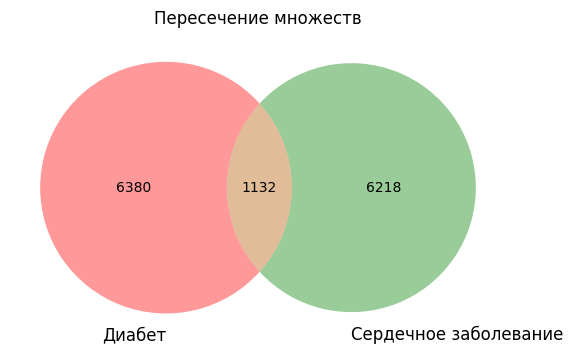

In [ ]:
diabetic = set(df.query("Diabetes == True")['ID'])
heart_disease = set(df.query("Heart_Disease_History == True")['ID'])

venn2([diabetic, heart_disease], ('Диабет', 'Сердечное заболевание'))
plt.title('Пересечение множеств')
plt.show()

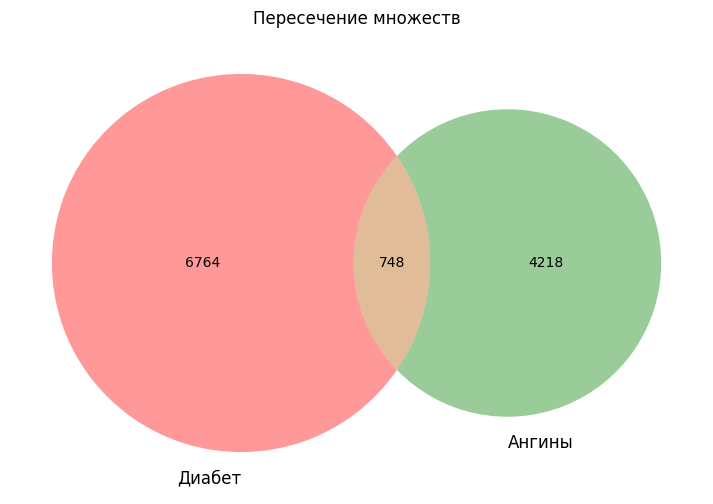

In [ ]:
diabetic = set(df.query("Diabetes == True")['ID'])
heart_disease = set(df.query("Angina == True")['ID'])

plt.figure(figsize=(10, 6))
venn2([diabetic, heart_disease], ('Диабет', 'Ангины'))
plt.title('Пересечение множеств')
plt.show()

In [ ]:
# Обучение
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
categorical_columns = ['Gender', 'Region', 'Exercise_Level', 'Alcohol_Consumption', 'Occupation', 'Physical_Activity']

for col in categorical_columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Region,0
Blood_Pressure,0
Cholesterol,0
BMI,0
Heart_Rate,0
Exercise_Level,0
Smoking,0


In [ ]:
if df['Alcohol_Consumption'].isna().any():
    df['Alcohol_Consumption'].fillna(df['Alcohol_Consumption'].mode()[0], inplace=True)

In [ ]:
X = df.drop(['Heart_Attack'], axis=1)
y = df['Heart_Attack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df['Age_Coefficient'] = df['Age'] * df['Cholesterol'] / df['BMI']

In [ ]:
def age_group(age):
    if age <= 18:
        return 'Young'
    elif age > 18:
        return 'adult'

df['Age_Group'] = df['Age'].apply(age_group)
le = LabelEncoder()
df['Age_Group_Encoded'] = le.fit_transform(df['Age_Group'])
df.drop(columns=['Age_Group'], inplace=True)

In [ ]:
df['Physical_Activity_Index'] = df['Physical_Activity'] + df['Stress_Level']

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_rmse = np.sqrt(rf_mse)
print(f"RF RMSE: {rf_rmse}")

RF RMSE: 0.32550454681924185


In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

y_gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, y_gb_pred)
gb_rmse = np.sqrt(gb_mse)
print(f"GB RMSE: {gb_rmse}")

GB RMSE: 0.3192916463318804


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_lr_pred)
lr_rmse = np.sqrt(lr_mse)
print(f"LR RMSE: {lr_rmse}")

LR RMSE: 0.3186647876239428


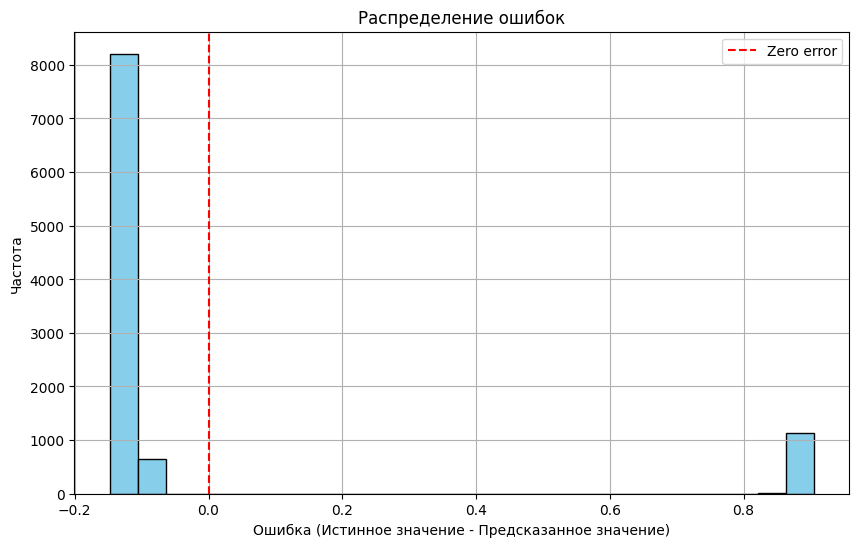

In [ ]:
errors = y_test - y_lr_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=25, edgecolor='black', facecolor='skyblue')
plt.axvline(x=0, color='red', linestyle='--', label='Zero error')
plt.xlabel('Ошибка (Истинное значение - Предсказанное значение)')
plt.ylabel('Частота')
plt.title('Распределение ошибок')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
test_mse = mean_squared_error(y_test, y_lr_pred)
test_rmse = np.sqrt(test_mse)
print(f"Точность модели на тестовых данных: {(test_rmse * 100):.2f}%")

Точность модели на тестовых данных: 31.87%


In [ ]:
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
print(f"Точность модели на обучающих данных: {(train_rmse * 100):.2f}%")

Точность модели на обучающих данных: 32.29%
